In [1]:
import numpy as np
from scipy.spatial.transform import Rotation as R
import matplotlib.pyplot as plt

In [72]:
def find_angle_vector(a,b):
    v1=a[:2]
    v2=b[:2]
    theta=np.arccos(np.dot(v1,v2)/(np.sqrt(np.sum(np.square(v1)))*np.sqrt(np.sum(np.square(v1)))))
    return theta

In [83]:
n=100
pitches=np.linspace(-np.pi/4,np.pi/4,100)
yaws=np.linspace(-np.pi/4,np.pi/4,100)
thetas=np.zeros((100,100))
ratios=np.zeros((100,100))

In [84]:
v1=[1,0,0]
v2=[0,1,0]

In [85]:
def pipeline(r):
    v1=[10,0,0]
    v2=[0,10,0]
    
    v1=r.apply(v1)
    v2=r.apply(v2)
    
    theta=find_angle_vector(v1,v2)
    
    V=np.array([v1[:2],v2[:2]])
    o=np.zeros_like(V)
    plt.quiver(*o,V[:,0],V[:,1],color=['r','g','b'],scale=50)
    plt.show()
    
    dist1=np.sqrt(np.sum(np.square(v1[:2])))
    dist2=np.sqrt(np.sum(np.square(v2[:2])))
    
    print(f'1: {dist1}, 2: {dist2}')
    print(f'theta: {theta}')

In [86]:
v1_r[:2]

array([0., 0.])

In [87]:
for i in range(len(pitches)):
    for j in range(len(yaws)):
        r=R.from_euler('xyz',[pitches[i],yaws[j],0])
        v1_r=r.apply(v1)
        v2_r=r.apply(v2)
        v1_r_n=np.sqrt(np.sum(np.square(v1_r[:2])))
        v2_r_n=np.sqrt(np.sum(np.square(v2_r[:2])))
        ratios[i][j]=v1_r_n/v2_r_n
        thetas[i][j]=find_angle_vector(v1_r,v2_r)

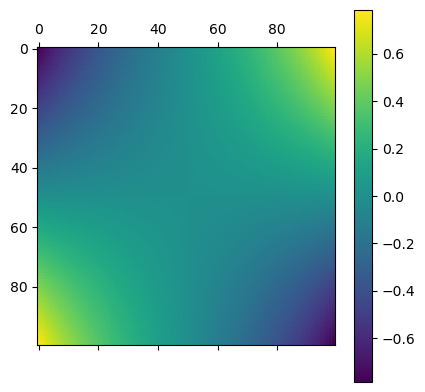

In [88]:
plt.matshow(thetas-np.pi/2)
plt.colorbar()
plt.show()

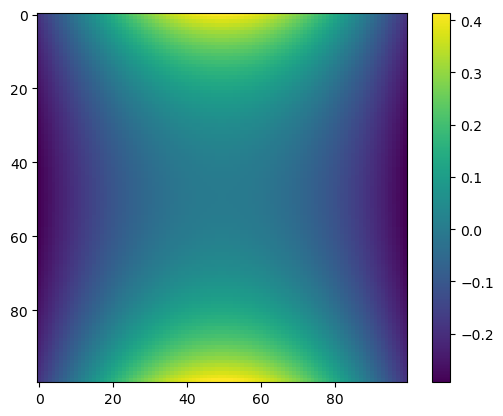

In [90]:
plt.imshow(ratios-1)
plt.colorbar()
plt.show()

In [61]:
yaws[50]

0.015866629563584977

In [60]:
thetas[50][50]

1.5705445662941502

In [82]:
find_angle_vector(v1_r,v2_r)

C:\Users\khb10\AppData\Local\Temp\ipykernel_28556\2049316733.py:4: RuntimeWarning: invalid value encountered in double_scalars
  theta=np.arccos(np.dot(v1,v2)/(np.sqrt(np.sum(np.square(v1)))*np.sqrt(np.sum(np.square(v1)))))


nan